In [11]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

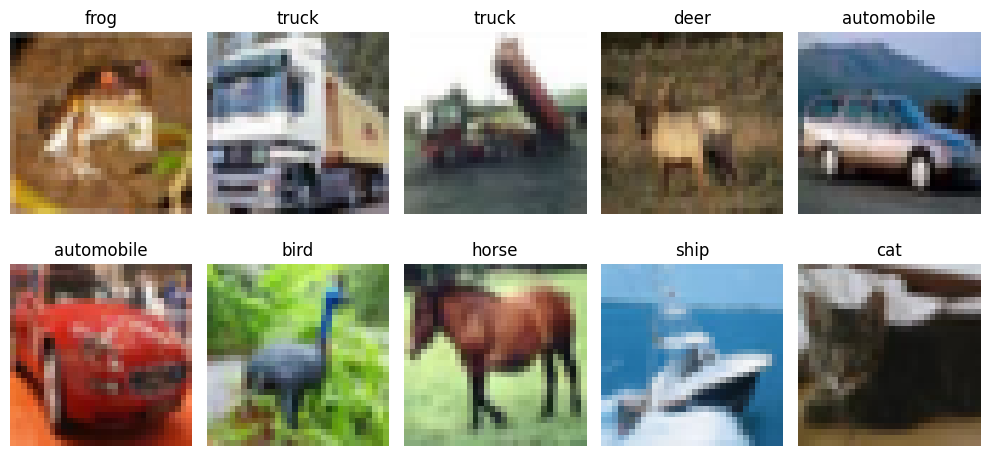

In [12]:
# Visualize some examples
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Rescaling
import tensorflow as tf

In [13]:
# -------------------------------
#  Normalize images (0–255 → 0–1)
# -------------------------------

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [ ]:
# -------------------------------
## Convert labels to one-hot vectors
#    (if using categorical_crossentropy)
# -------------------------------
#y_train_cat = to_categorical(y_train, num_classes=10)
#y_test_cat = to_categorical(y_test, num_classes=10)

# -------------------------------
## No need to convert the labels: labels are integers
#    (if using sparse_categorical_crossentropy)
# -------------------------------

# **First model**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [7]:
# -------------------------------
# Define CNN model
# -------------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu',
           input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# -------------------------------
#  Compile model
# -------------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# -------------------------------
# Train model
# -------------------------------
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3076 - loss: 1.8771 - val_accuracy: 0.5237 - val_loss: 1.3468
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4973 - loss: 1.3929 - val_accuracy: 0.5778 - val_loss: 1.2105
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5481 - loss: 1.2607 - val_accuracy: 0.6221 - val_loss: 1.0735
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5921 - loss: 1.1475 - val_accuracy: 0.6366 - val_loss: 1.0323
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6188 - loss: 1.0824 - val_accuracy: 0.6424 - val_loss: 1.0374
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6439 - loss: 1.0155 - val_accuracy: 0.6504 - val_loss: 0.9921
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6580 - loss: 0.9734 - val_accuracy: 0.6678 - val_loss: 0.9499
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6729 - loss: 0.9269 - val_accuracy: 0.

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7133 - loss: 0.8774

✅ Test Accuracy: 0.7086


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.7086
Precision: 0.7091
Recall: 0.7086
F1 Score: 0.7075


In [14]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.73      0.77      0.75      1000
  automobile       0.84      0.83      0.84      1000
        bird       0.65      0.53      0.59      1000
         cat       0.51      0.54      0.52      1000
        deer       0.68      0.61      0.64      1000
         dog       0.57      0.63      0.60      1000
        frog       0.76      0.82      0.79      1000
       horse       0.77      0.71      0.74      1000
        ship       0.77      0.85      0.81      1000
       truck       0.81      0.79      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


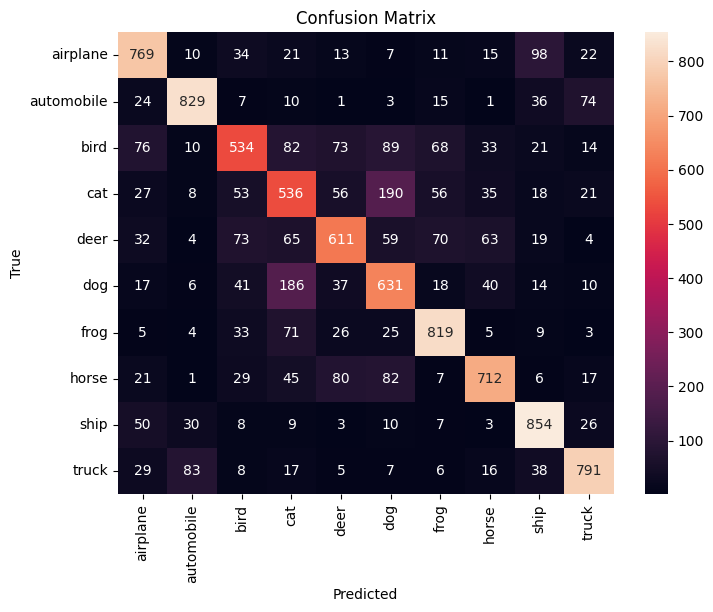

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict & confusion matrix
y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


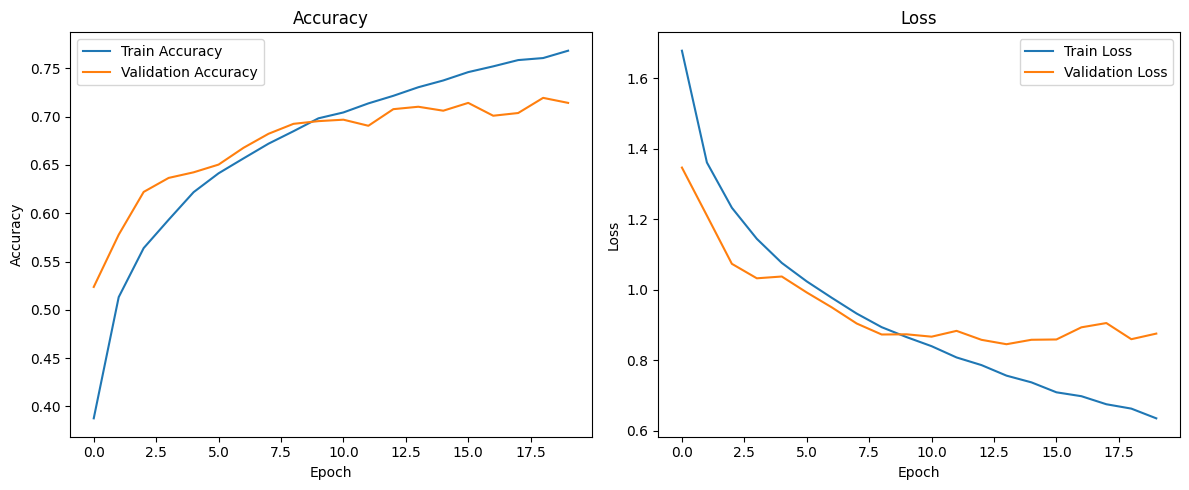

In [27]:
#-------------------------------
# Plot training history
# -------------------------------

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Second model**

In [16]:
# -------------------------------
# Define CNN model
# -------------------------------
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,146 (887.29 KB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# -------------------------------
#  Compile model
# -------------------------------
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [18]:
# -------------------------------
# Train model
# -------------------------------
history2 = model2.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2751 - loss: 1.9274 - val_accuracy: 0.5119 - val_loss: 1.3553
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5142 - loss: 1.3515 - val_accuracy: 0.5683 - val_loss: 1.1945
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5813 - loss: 1.1681 - val_accuracy: 0.6039 - val_loss: 1.1047
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6295 - loss: 1.0482 - val_accuracy: 0.6551 - val_loss: 0.9709
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6596 - loss: 0.9653 - val_accuracy: 0.6708 - val_loss: 0.9351
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6848 - loss: 0.8925 - val_accuracy: 0.6798 - val_loss: 0.9036
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7050 - loss: 0.8371 - val_accuracy: 0.6712 - val_loss: 0.9466
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7227 - loss: 0.7868 - val_accuracy: 0.

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class probabilities
y_pred_probs = model2.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.7069
Precision: 0.7124
Recall: 0.7069
F1 Score: 0.7082


In [20]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.74      0.73      0.74      1000
  automobile       0.85      0.82      0.84      1000
        bird       0.54      0.65      0.59      1000
         cat       0.56      0.49      0.52      1000
        deer       0.64      0.69      0.66      1000
         dog       0.60      0.66      0.63      1000
        frog       0.76      0.78      0.77      1000
       horse       0.81      0.68      0.74      1000
        ship       0.83      0.79      0.81      1000
       truck       0.79      0.78      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



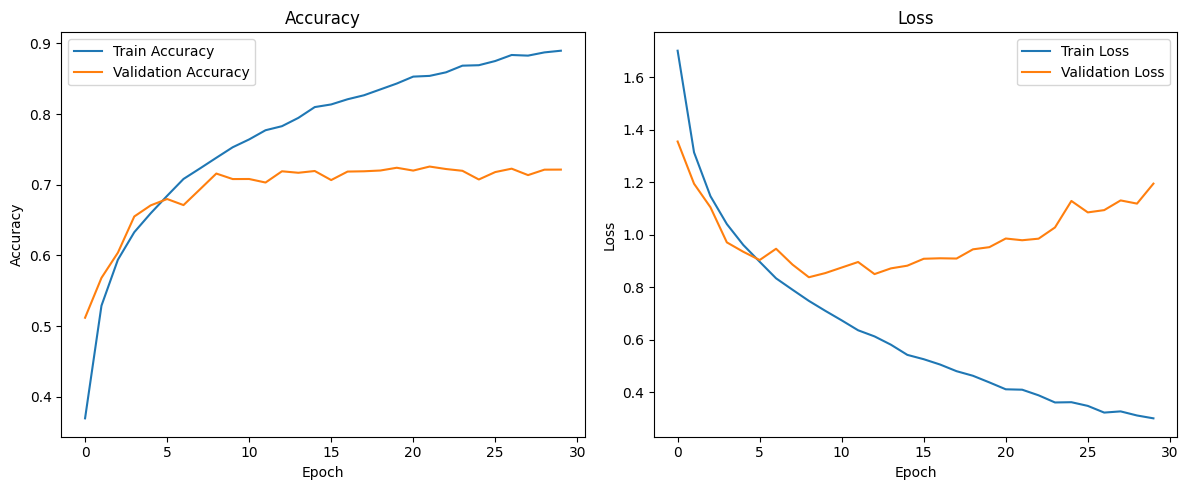

In [26]:
#-------------------------------
# Plot training history
# -------------------------------

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# **Model improvement**

⚡ Ways to improve performance

1️⃣ Data normalization & augmentation

Make sure pixel values are scaled to [0,1] or [-1,1].

Add data augmentation to improve generalization:

2️⃣ Train longer / adjust learning rate

20 epochs may be too short for CIFAR-10.

Try 50–100 epochs with ReduceLROnPlateau callback:

3️⃣ Model improvements

Your model is okay, but deeper/wider architectures help.

Common improvements for CIFAR-10:

Add BatchNormalization after each Conv2D

Increase filters: 32 → 64 → 128 → 256

Use GlobalAveragePooling2D instead of Flatten (reduces overfitting)

Add more dropout if overfitting

4️⃣ Optimizers & learning rates

Adam is good, but try Adam with smaller lr (1e-3 → 1e-4) or SGD with momentum for more stable training.

5️⃣ Pretrained models (Transfer Learning)

CIFAR-10 is small, so using ResNet, VGG, or MobileNet pretrained on ImageNet can get 85–95% accuracy without massive training.

# **Third model**

Applying early stopping, increase epochs to 60

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Setup EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # metric to monitor
    patience=3,           # stop if no improvement after 3 epochs
    restore_best_weights=True
)

# Train the model with early stopping
history3 = model3.fit(
    X_train, y_train,
    epochs=60,             # large max epochs, training will stop early if needed
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model3.evaluate(X_test, y_test)
print(f"Test accuracy with early stopping: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2716 - loss: 1.9486 - val_accuracy: 0.5119 - val_loss: 1.3564
Epoch 2/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5145 - loss: 1.3483 - val_accuracy: 0.5874 - val_loss: 1.1703
Epoch 3/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5896 - loss: 1.1674 - val_accuracy: 0.6124 - val_loss: 1.0972
Epoch 4/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6271 - loss: 1.0647 - val_accuracy: 0.6479 - val_loss: 0.9996
Epoch 5/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6613 - loss: 0.9667 - val_accuracy: 0.6686 - val_loss: 0.9649
Epoch 6/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6846 - loss: 0.9032 - val_accuracy: 0.6748 - val_loss: 0.9271
Epoch 7/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7121 - loss: 0.8295 - val_accuracy: 0.6827 - val_loss: 0.9138
Epoch 8/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7272 - loss: 0.7821 - val_accuracy: 0.

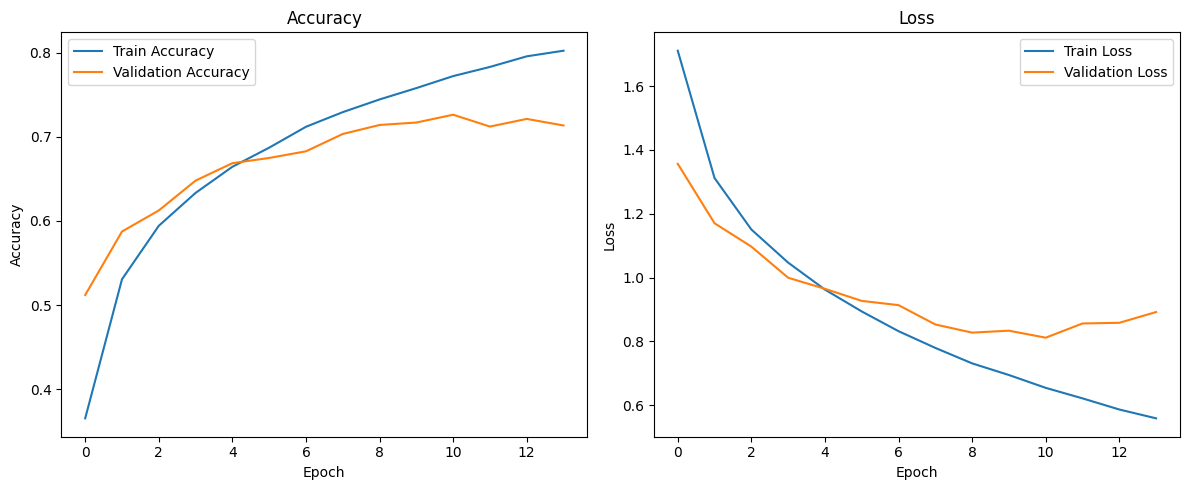

In [24]:
# -------------------------------
# Plot training history
# -------------------------------
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# **Fourth model: data augmentation**

In [28]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,       # randomly rotate images by up to 15 degrees
    width_shift_range=0.1,   # randomly shift images horizontally by 10%
    height_shift_range=0.1,  # randomly shift images vertically by 10%
    zoom_range=0.1,          # randomly zoom in/out by 10%
    horizontal_flip=True     # randomly flip images horizontally
)

datagen.fit(X_train)


history4 = model2.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=30
)

# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Test accuracy with early stopping: {accuracy:.4f}")

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.6354 - loss: 1.1081 - val_accuracy: 0.6974 - val_loss: 0.9212
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6565 - loss: 1.0020 - val_accuracy: 0.6996 - val_loss: 0.9080
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6708 - loss: 0.9636 - val_accuracy: 0.7161 - val_loss: 0.8324
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6798 - loss: 0.9351 - val_accuracy: 0.7178 - val_loss: 0.8623
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6840 - loss: 0.9170 - val_accuracy: 0.7307 - val_loss: 0.8022
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6861 - loss: 0.9000 - val_accuracy: 0.7270 - val_loss: 0.8103
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6899 - loss: 0.8906 - val_accuracy: 0.7131 - val_loss: 0.8772
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6995 - loss: 0.8676 - val_accurac

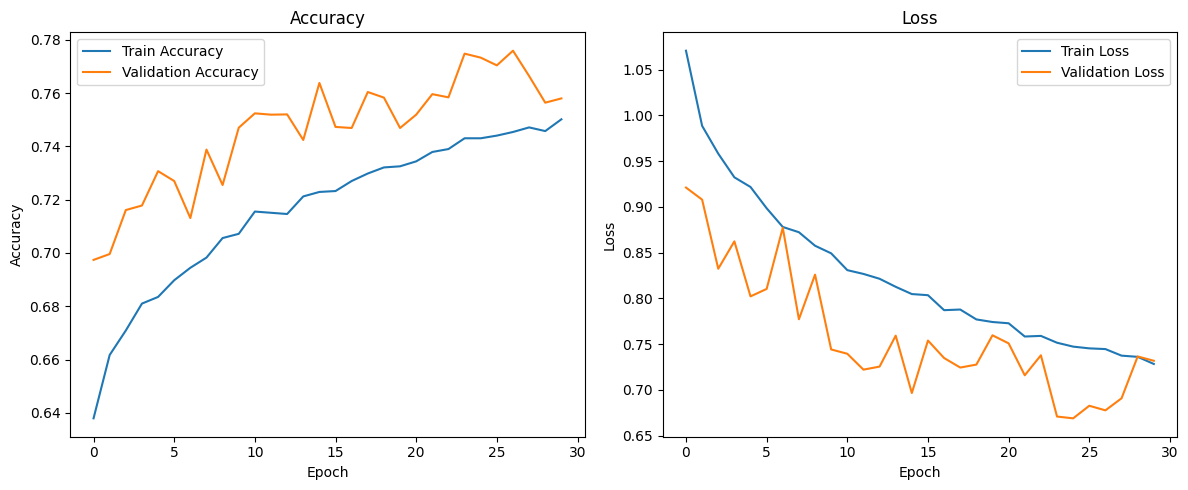

In [29]:
# -------------------------------
# Plot training history
# -------------------------------
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history4.history['loss'], label='Train Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save('model1.keras')

In [ ]:
model2.save('model2.keras')

In [ ]:
model3.save('model3.keras')

In [ ]:
from google.colab import files
files.download('model1.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('model2.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('model3.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **ChatGPT version to improve accuracy**

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.3306 - loss: 1.8435 - val_accuracy: 0.4058 - val_loss: 1.6689 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.5114 - loss: 1.3491 - val_accuracy: 0.5842 - val_loss: 1.1498 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.5793 - loss: 1.1876 - val_accuracy: 0.6362 - val_loss: 1.0484 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.6224 - loss: 1.0650 - val_accuracy: 0.6162 - val_loss: 1.1147 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.6487 - loss: 1.0010 - val_accuracy: 0.6307 - val_loss: 1.0385 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.6699 - loss: 0.9448 - val_accuracy: 0.6974 - val_loss: 0.8623 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.6802 - loss: 0.9035

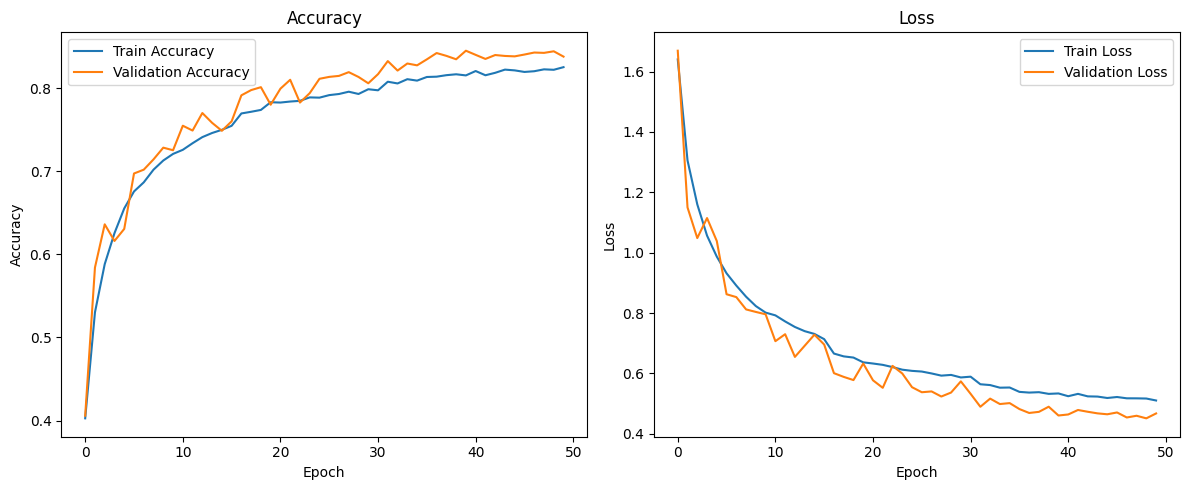

In [ ]:
# -------------------------------
# 1️⃣ Import libraries
# -------------------------------
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# -------------------------------
# 2️⃣ Load CIFAR-10 dataset
# -------------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten labels for sparse_categorical_crossentropy
y_train = y_train.flatten()
y_test = y_test.flatten()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# -------------------------------
# 3️⃣ Data augmentation
# -------------------------------
datagen = ImageDataGenerator(
    rotation_range=15,       # randomly rotate images by up to 15 degrees
    width_shift_range=0.1,   # randomly shift images horizontally by 10%
    height_shift_range=0.1,  # randomly shift images vertically by 10%
    zoom_range=0.1,          # randomly zoom in/out by 10%
    horizontal_flip=True     # randomly flip images horizontally
)

datagen.fit(X_train)

# -------------------------------
# 4️⃣ Define improved CNN model
# -------------------------------
model5 = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# -------------------------------
# 5️⃣ Compile model
# -------------------------------
model5.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -------------------------------
# 6️⃣ Learning rate reduction callback
# -------------------------------
lr_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    factor=0.5,
    verbose=1
)

# -------------------------------
# 7️⃣ Train model with data augmentation
# -------------------------------
history5 = model5.fit(
    datagen.flow(X_train, y_train, batch_size=64, subset='training'),
    validation_data=datagen.flow(X_train, y_train, batch_size=64, subset='validation'),
    epochs=50,
    callbacks=[lr_reduction],
    verbose=1
)

# -------------------------------
# 8️⃣ Evaluate on test data
# -------------------------------
test_loss, test_acc = model5.evaluate(X_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# -------------------------------
# 9️⃣ Plot training history
# -------------------------------
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.save('model_new.keras')

In [ ]:
my_model=tf.keras.models.load_model('model_new.keras')

In [ ]:
prediction=my_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
print(np.argmax(prediction[0]))

3


In [ ]:
y_test_cat[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from google.colab import files
files.download('model_new.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Why this setup is better

Data augmentation → improves generalization and reduces overfitting.

Batch normalization → stabilizes learning and allows higher learning rates.

Dropout → prevents overfitting.

GlobalAveragePooling2D → reduces parameters, better generalization than Flatten.

Longer training (50 epochs) + ReduceLROnPlateau → helps the model converge more steadily.

Sparse labels with sparse_categorical_crossentropy → avoids one-hot encoding hassle.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving model_new.keras to model_new.keras


In [ ]:
from tensorflow import keras

model = keras.models.load_model('model_new.keras')

In [ ]:
prediction=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [ ]:
import numpy as np

In [ ]:
print(np.argmax(prediction[0]))

3


# **Model comparison**

**Load saved model**

In [9]:
from google.colab import files
import os

# Create a folder to store uploaded models
upload_dir = "/content/uploaded_models"
os.makedirs(upload_dir, exist_ok=True)

print("📁 Please select your 4 saved model files (.keras):")

# Upload files
uploaded = files.upload()

# Save them into the folder
for filename, filedata in uploaded.items():
    filepath = os.path.join(upload_dir, filename)
    with open(filepath, 'wb') as f:
        f.write(filedata)
    print(f"✅ Saved: {filepath}")

📁 Please select your 4 saved model files (.keras):


Saving model_new.keras to model_new.keras
Saving model1.keras to model1.keras
Saving model2.keras to model2.keras
Saving model3.keras to model3.keras
✅ Saved: /content/uploaded_models/model_new.keras
✅ Saved: /content/uploaded_models/model1.keras
✅ Saved: /content/uploaded_models/model2.keras
✅ Saved: /content/uploaded_models/model3.keras


In [10]:
import tensorflow as tf
import os

upload_dir = "/content/uploaded_models"

model1 = tf.keras.models.load_model(os.path.join(upload_dir, 'model1.keras'))
model2 = tf.keras.models.load_model(os.path.join(upload_dir, 'model2.keras'))
model3 = tf.keras.models.load_model(os.path.join(upload_dir, 'model3.keras'))
model4 = tf.keras.models.load_model(os.path.join(upload_dir, 'model_new.keras'))

 **Model 1: baseline model**

In [15]:
history1 = model1.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7577 - loss: 0.6652 - val_accuracy: 0.7084 - val_loss: 0.8980
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7687 - loss: 0.6397 - val_accuracy: 0.7134 - val_loss: 0.8961
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7744 - loss: 0.6193 - val_accuracy: 0.7198 - val_loss: 0.8881
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7814 - loss: 0.6047 - val_accuracy: 0.7117 - val_loss: 0.8887
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7908 - loss: 0.5777 - val_accuracy: 0.7072 - val_loss: 0.9500
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7898 - loss: 0.5704 - val_accuracy: 0.7004 - val_loss: 0.9300
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7978 - loss: 0.5552 - val_accuracy: 0.7098 - val_loss: 0.9630
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8027 - loss: 0.5511 - val_accuracy: 0.

In [55]:
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7034 - loss: 1.1550

✅ Test Accuracy: 0.6997


**Model 2: add 1 more layer + epochs 3**

In [17]:
history2 = model2.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8111 - loss: 0.5376 - val_accuracy: 0.8278 - val_loss: 0.5012
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8417 - loss: 0.4558 - val_accuracy: 0.8165 - val_loss: 0.5501
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8533 - loss: 0.4143 - val_accuracy: 0.8190 - val_loss: 0.5363
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8647 - loss: 0.3760 - val_accuracy: 0.8189 - val_loss: 0.5299
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8765 - loss: 0.3422 - val_accuracy: 0.8147 - val_loss: 0.5709
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8860 - loss: 0.3182 - val_accuracy: 0.8235 - val_loss: 0.5755
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8935 - loss: 0.2903 - val_accuracy: 0.8125 - val_loss: 0.6145
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8966 - loss: 0.2764 - val_accuracy: 0.

In [19]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7782 - loss: 1.3133

✅ Test Accuracy: 0.7744


**Model5: Model2 + Data augmentation/Batch Normalization/Learning rate reduction**

In [22]:
history4 = model4.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.8464 - loss: 0.4550 - val_accuracy: 0.8978 - val_loss: 0.2951
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8453 - loss: 0.4533 - val_accuracy: 0.8978 - val_loss: 0.2946
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8436 - loss: 0.4589 - val_accuracy: 0.8985 - val_loss: 0.2928
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8497 - loss: 0.4377 - val_accuracy: 0.8992 - val_loss: 0.2929
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8502 - loss: 0.4455 - val_accuracy: 0.8988 - val_loss: 0.2897
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8501 - loss: 0.4348 - val_accuracy: 0.8978 - val_loss: 0.2915
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8525 - loss: 0.4344 - val_accuracy: 0.8970 - val_loss: 0.2911
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8470 - loss: 0.4434 - val_accuracy

In [23]:
st_loss, test_acc = model4.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8663 - loss: 0.3878

✅ Test Accuracy: 0.8644


**Model4: model 2 + data augmentation**

In [25]:
#adding data augmentation to model 2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,       # randomly rotate images by up to 15 degrees
    width_shift_range=0.1,   # randomly shift images horizontally by 10%
    height_shift_range=0.1,  # randomly shift images vertically by 10%
    zoom_range=0.1,          # randomly zoom in/out by 10%
    horizontal_flip=True     # randomly flip images horizontally
)

datagen.fit(X_train)


history5 = model2.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=30
)

# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Test accuracy with early stopping: {accuracy:.4f}")

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.6967 - loss: 0.9874 - val_accuracy: 0.7459 - val_loss: 0.8237
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7213 - loss: 0.8324 - val_accuracy: 0.7445 - val_loss: 0.8245
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7337 - loss: 0.7913 - val_accuracy: 0.7629 - val_loss: 0.7262
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7382 - loss: 0.7701 - val_accuracy: 0.7571 - val_loss: 0.7630
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7466 - loss: 0.7503 - val_accuracy: 0.7684 - val_loss: 0.7225
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7492 - loss: 0.7390 - val_accuracy: 0.7652 - val_loss: 0.7257
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7552 - loss: 0.7176 - val_accuracy: 0.7776 - val_loss: 0.6597
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7518 - loss: 0.7128 - val_accurac

In [41]:
from tensorflow.keras.models import clone_model

model_aug = clone_model(model2)
model_aug.set_weights(model2.get_weights())  # copy weights
model_aug.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
datagen = ImageDataGenerator(
    rotation_range=15,       # randomly rotate images by up to 15 degrees
    width_shift_range=0.1,   # randomly shift images horizontally by 10%
    height_shift_range=0.1,  # randomly shift images vertically by 10%
    zoom_range=0.1,          # randomly zoom in/out by 10%
    horizontal_flip=True     # randomly flip images horizontally
)

datagen.fit(X_train)


history5 = model_aug.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=30
)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.7856 - loss: 0.6343 - val_accuracy: 0.7968 - val_loss: 0.6081
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.7845 - loss: 0.6355 - val_accuracy: 0.8019 - val_loss: 0.5980
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7827 - loss: 0.6365 - val_accuracy: 0.7960 - val_loss: 0.6278
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7885 - loss: 0.6191 - val_accuracy: 0.7870 - val_loss: 0.6439
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7871 - loss: 0.6222 - val_accuracy: 0.7873 - val_loss: 0.6442
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7901 - loss: 0.6113 - val_accuracy: 0.7886 - val_loss: 0.6424
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7860 - loss: 0.6206 - val_accuracy: 0.8028 - val_loss: 0.6034
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7893 - loss: 0.6153 - val_accurac

**Model 3: Model 2+ early stopping**

In [44]:
from tensorflow.keras.models import clone_model

model6 = clone_model(model2)
model6.set_weights(model2.get_weights())  # copy weights
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
from tensorflow.keras.callbacks import EarlyStopping
# Setup EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',   # metric to monitor
    patience=10,           # stop if no improvement after 10 epochs
    restore_best_weights=True
)

# Train the model with early stopping
history6 = model6.fit(
    X_train, y_train,
    epochs=60,             # large max epochs, training will stop early if needed
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8991 - loss: 0.2747 - val_accuracy: 0.8498 - val_loss: 0.4927
Epoch 2/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9153 - loss: 0.2340 - val_accuracy: 0.8470 - val_loss: 0.5076
Epoch 3/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9214 - loss: 0.2142 - val_accuracy: 0.8392 - val_loss: 0.5463
Epoch 4/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9306 - loss: 0.1887 - val_accuracy: 0.8294 - val_loss: 0.6560
Epoch 5/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9391 - loss: 0.1712 - val_accuracy: 0.8397 - val_loss: 0.6075
Epoch 6/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9453 - loss: 0.1503 - val_accuracy: 0.8382 - val_loss: 0.6381
Epoch 7/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9477 - loss: 0.1477 - val_accuracy: 0.8325 - val_loss: 0.6869
Epoch 8/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9513 - loss: 0.1354 - val_accuracy: 0.

In [52]:
# Evaluate the model
loss, accuracy = model6.evaluate(X_test, y_test)
print(f"Test accuracy with early stopping: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8096 - loss: 0.6612
Test accuracy with early stopping: 0.8076


**Comparison plot**

In [32]:
import matplotlib.pyplot as plt

def plot_model_histories(histories, model_names):

    plt.figure(figsize=(16, 6))

    # -------------------------
    # Plot Accuracy
    # -------------------------
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['accuracy'], label=f'{name} Train Acc')
        plt.plot(history.history['val_accuracy'], '--', label=f'{name} Val Acc')

    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # -------------------------
    # Plot Loss
    # -------------------------
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['loss'], label=f'{name} Train Loss')
        plt.plot(history.history['val_loss'], '--', label=f'{name} Val Loss')

    plt.title('Model Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


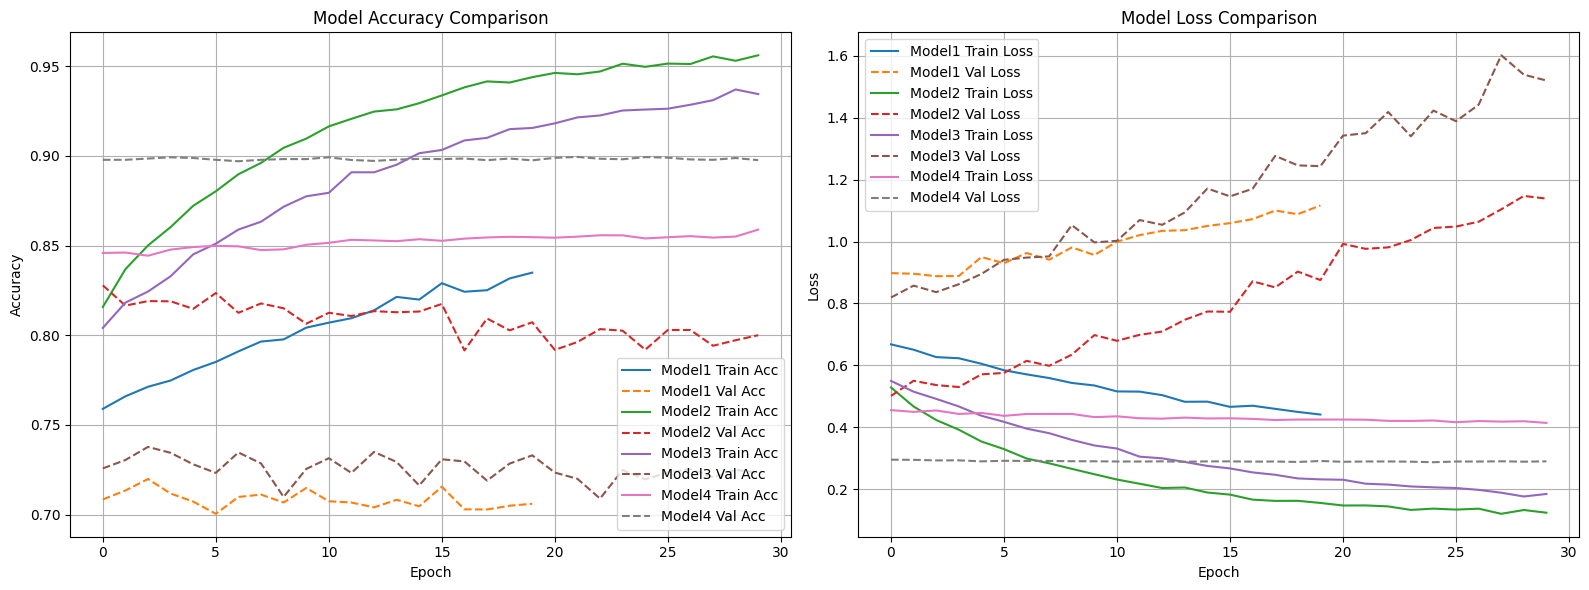

In [33]:
histories = [history1, history2, history3, history4]
names = ["Model1", "Model2", "Model3", "Model4"]

plot_model_histories(histories, names)

In [39]:
import matplotlib.pyplot as plt

def plot_model_histories2(histories, model_names):

    plt.figure(figsize=(16, 6))

    # -------------------------
    # Plot Accuracy
    # -------------------------
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_accuracy'], '--', label=f'{name} Val Acc')

    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # -------------------------
    # Plot Loss
    # -------------------------
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_loss'], '--', label=f'{name} Val Loss')

    plt.title('Model Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

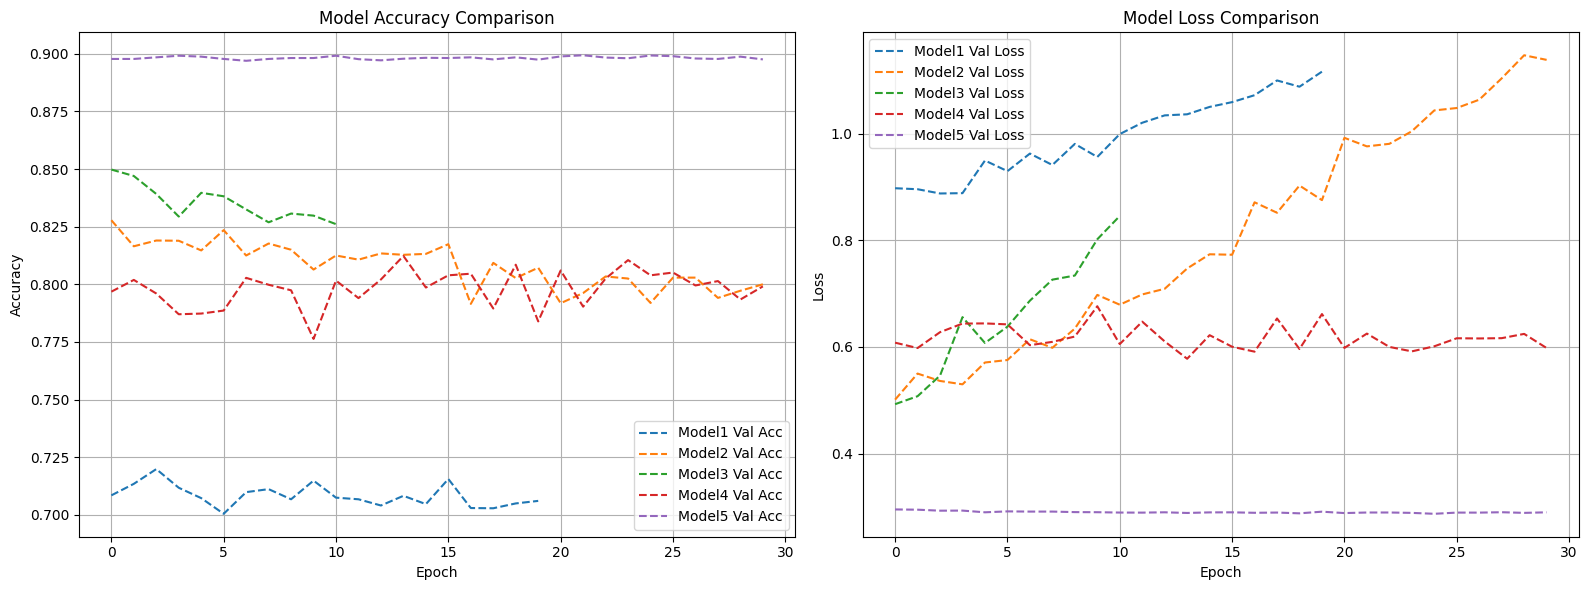

In [54]:
histories = [history1, history2, history6, history5, history4]
names = ["Model1", "Model2", "Model3", "Model4", "Model5"]

plot_model_histories2(histories, names)